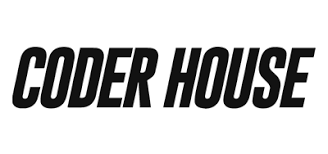

# TRABAJO FINAL CODER HOUSE

# Contenido
1. [Importar datos y análisis iniciales](#1)
2. [Data Wrangling](#2)
3. [Conclusiones de Análisis inicial](#3)

### 1. Importar datos y análisis iniciales  <a name="1"></a>

Importar librerias que utilizaremos a lo largo del proyecto

In [1]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [92]:
!pip install plotly --upgrade
!pip install plotly.express --upgrade

  Attempting uninstall: plotly
    Found existing installation: plotly 5.2.1
    Uninstalling plotly-5.2.1:
      Successfully uninstalled plotly-5.2.1


In [2]:
import pandas as pd
import numpy as np
from seaborn import boxplot
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
import pandas_profiling
from pandas_profiling import ProfileReport

La base de datos que utilizaremos en este proyecto fueron recolctados por la universidad "Donald Bren School of Information and Computer Sciences University" en California. Otorgando los permisos necesarios al Hospital Nacional Universitario de CoderHouse para poder utilizarlos y teniendo en cuenta que contamos con una población similar para poder predecir que el comportamiento de sus paciente darian un resultado similar para nuestros pacientes

In [9]:
url = 'https://raw.githubusercontent.com/camilateruel/Trabajo_Final_Coder/main/Dataset/heart.csv'
df_corazon = pd.read_csv(url)
df_corazon.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

Que tipo de datos tenemos y observamos no tener registros nulos

In [10]:
df_corazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df_corazon.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
# Nos indica el número de columnas y filas del dataframe
df_corazon.shape

(303, 14)

### 2. Data Wrangling  <a name="2"></a>

---

**Operaciones en data wrangling**

Entre las operaciones más habituales en la etapa de data wrangling tenemos:

- Tratamiento de valores nulos.

- Formateo de valores numéricos, strings.

- Adición/eliminación de nuevas variables.

- Tramiento de registros duplicados.

- Unión con otras fuentes de datos.

- Agrupación de datos

- Indexación y sorting.

Para un mayor entendimiento se cambiaran los nombres de las columnas. 

In [15]:
df_corazon.columns

Index(['Edad', 'Genero', 'Tipo_dolor_en_pecho', 'Presión_arterial_reposo',
       'Colesterol', 'Glucemia_ayunas',
       'Resultados_electrocardiográficos_reposo', 'Frecuencia_cardíaca_máx',
       'Angina_inducida_ejercicio', 'Depresión', 'Punto_maximo',
       'Arterias_con_problemas', 'Talasemia', 'Target'],
      dtype='object')

In [12]:
df_corazon.columns = ['Edad', 'Genero', 'Tipo_dolor_en_pecho', 
              'Presión_arterial_reposo', 'Colesterol', 
              'Glucemia_ayunas', 'Resultados_electrocardiográficos_reposo', 
              'Frecuencia_cardíaca_máx', 'Angina_inducida_ejercicio', 
              'Depresión', 'Punto_maximo', 'Arterias_con_problemas', 'Talasemia', 'Target']
df_corazon.head()

Edad  Genero  Tipo_dolor_en_pecho  Presión_arterial_reposo  Colesterol  \
0    63       1                    3                      145         233   
1    37       1                    2                      130         250   
2    41       0                    1                      130         204   
3    56       1                    1                      120         236   
4    57       0                    0                      120         354   

   Glucemia_ayunas  Resultados_electrocardiográficos_reposo  \
0                1                                        0   
1                0                                        1   
2                0                                        0   
3                0                                        1   
4                0                                        1   

   Frecuencia_cardíaca_máx  Angina_inducida_ejercicio  Depresión  \
0                      150                          0        2.3   
1                      187                          0        3.5   
2                      172                          0        1.4   
3                      178                          0        0.8   
4                      163                          1        0.6   

   Punto_maximo  Arterias_con_problemas  Talasemia  Target  
0             0                       0          1       1  
1             0                       0          2       1  
2             2                       0          2       1  
3             2                       0          2       1  
4             2                       0          2       1

In [14]:
df_corazon.columns

Index(['Edad', 'Genero', 'Tipo_dolor_en_pecho', 'Presión_arterial_reposo',
       'Colesterol', 'Glucemia_ayunas',
       'Resultados_electrocardiográficos_reposo', 'Frecuencia_cardíaca_máx',
       'Angina_inducida_ejercicio', 'Depresión', 'Punto_maximo',
       'Arterias_con_problemas', 'Talasemia', 'Target'],
      dtype='object')

Analisis de las variables mediante pandas_profiling que nos da un pantallazo general de que contiene cada variable, distribuciones, estadísticos.

In [13]:
#Data Profiling
profile = pandas_profiling.ProfileReport(df_corazon)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
# Devuelve el número de elementos únicos por campo
df_corazon.nunique()

Edad                                        41
Genero                                       2
Tipo_dolor_en_pecho                          4
Presión_arterial_reposo                     49
Colesterol                                 152
Glucemia_ayunas                              2
Resultados_electrocardiográficos_reposo      3
Frecuencia_cardíaca_máx                     91
Angina_inducida_ejercicio                    2
Depresión                                   40
Punto_maximo                                 3
Arterias_con_problemas                       5
Talasemia                                    4
Target                                       2
dtype: int64

**Análisis Individual de las variables y definimos algunos criterios para utilizar más adelante**

Definimos una funcion así calculamos porcentajes de los valores de cada variable

In [36]:
def get_perc(grp_obj):
    gr_size = grp_obj.size()
    return gr_size / gr_size.sum()

*Genero=Binario*

    0: Femenino 
    1: Masculino

In [37]:
df_corazon.groupby('Genero').pipe(get_perc)

Genero
0    0.316832
1    0.683168
dtype: float64

___
*Tipo_dolor_en_pecho: Categorico*

    0: Angina típica 
    1: Angina atípica 
    2: Dolor no anginoso 
    3: Asintomático 


In [38]:
df_corazon.groupby('Tipo_dolor_en_pecho').pipe(get_perc)

Tipo_dolor_en_pecho
0    0.471947
1    0.165017
2    0.287129
3    0.075908
dtype: float64

In [26]:
df_corazon.groupby(df_corazon.Tipo_dolor_en_pecho).Tipo_dolor_en_pecho.count()

Tipo_dolor_en_pecho
0    143
1     50
2     87
3     23
Name: Tipo_dolor_en_pecho, dtype: int64

____
*Glucemia_ayunas=Binario*



In [39]:
df_corazon.groupby('Glucemia_ayunas').pipe(get_perc)

Glucemia_ayunas
0    0.851485
1    0.148515
dtype: float64

In [28]:
df_corazon.groupby(df_corazon.Glucemia_ayunas).Glucemia_ayunas.count()

Glucemia_ayunas
0    258
1     45
Name: Glucemia_ayunas, dtype: int64

___________
*Resultados_electrocardiográficos_reposo: Categorico*

    0: Normal 
    1: tener una anomalía de la onda
    2:muestra hipertrofia ventricular izquierda probable o definitiva

In [40]:
df_corazon.groupby('Resultados_electrocardiográficos_reposo').pipe(get_perc)

Resultados_electrocardiográficos_reposo
0    0.485149
1    0.501650
2    0.013201
dtype: float64

In [29]:
df_corazon.groupby(df_corazon.Resultados_electrocardiográficos_reposo).Resultados_electrocardiográficos_reposo.count()

Resultados_electrocardiográficos_reposo
0    147
1    152
2      4
Name: Resultados_electrocardiográficos_reposo, dtype: int64

_____
*Angina_inducida_ejercicio=Binario*

    0: No 
    1: Si

In [41]:
df_corazon.groupby('Angina_inducida_ejercicio').pipe(get_perc)

Angina_inducida_ejercicio
0    0.673267
1    0.326733
dtype: float64

In [30]:
df_corazon.groupby(df_corazon.Angina_inducida_ejercicio).Angina_inducida_ejercicio.count()

Angina_inducida_ejercicio
0    204
1     99
Name: Angina_inducida_ejercicio, dtype: int64

____
*Talasemia: Categórico*

    0: Nulo 
    1: Defecto fijo
    2: Flujo sanguineo normal
    3: Defecto reversible

In [42]:
df_corazon.groupby('Talasemia').pipe(get_perc)

Talasemia
0    0.006601
1    0.059406
2    0.547855
3    0.386139
dtype: float64

In [31]:
df_corazon.groupby(df_corazon.Talasemia).Talasemia.count()

Talasemia
0      2
1     18
2    166
3    117
Name: Talasemia, dtype: int64

_____
*Target=Binario*

0: Si 
1: No



In [43]:
df_corazon.groupby('Target').pipe(get_perc)

Target
0    0.455446
1    0.544554
dtype: float64

In [32]:
df_corazon.groupby(df_corazon.Target).Target.count()

Target
0    138
1    165
Name: Target, dtype: int64

Las variables restantes son númericas.

**Análsis univariado**

In [65]:
df_corazon_uni=df_corazon

In [52]:
df_corazon_uni.describe().T

count        mean        std    min  \
Edad                                     303.0   54.366337   9.082101   29.0   
Genero                                   303.0    0.683168   0.466011    0.0   
Tipo_dolor_en_pecho                      303.0    0.966997   1.032052    0.0   
Presión_arterial_reposo                  303.0  131.623762  17.538143   94.0   
Colesterol                               303.0  246.264026  51.830751  126.0   
Glucemia_ayunas                          303.0    0.148515   0.356198    0.0   
Resultados_electrocardiográficos_reposo  303.0    0.528053   0.525860    0.0   
Frecuencia_cardíaca_máx                  303.0  149.646865  22.905161   71.0   
Angina_inducida_ejercicio                303.0    0.326733   0.469794    0.0   
Depresión                                303.0    1.039604   1.161075    0.0   
Punto_maximo                             303.0    1.399340   0.616226    0.0   
Arterias_con_problemas                   303.0    0.729373   1.022606    0.0   
Talasemia                                303.0    2.313531   0.612277    0.0   
Target                                   303.0    0.544554   0.498835    0.0   

                                           25%    50%    75%    max  
Edad                                      47.5   55.0   61.0   77.0  
Genero                                     0.0    1.0    1.0    1.0  
Tipo_dolor_en_pecho                        0.0    1.0    2.0    3.0  
Presión_arterial_reposo                  120.0  130.0  140.0  200.0  
Colesterol                               211.0  240.0  274.5  564.0  
Glucemia_ayunas                            0.0    0.0    0.0    1.0  
Resultados_electrocardiográficos_reposo    0.0    1.0    1.0    2.0  
Frecuencia_cardíaca_máx                  133.5  153.0  166.0  202.0  
Angina_inducida_ejercicio                  0.0    0.0    1.0    1.0  
Depresión                                  0.0    0.8    1.6    6.2  
Punto_maximo                               1.0    1.0    2.0    2.0  
Arterias_con_problemas                     0.0    0.0    1.0    4.0  
Talasemia                                  2.0    2.0    3.0    3.0  
Target                                     0.0    1.0    1.0    1.0

**Creacion de histogramas**

In [58]:
%matplotlib inline

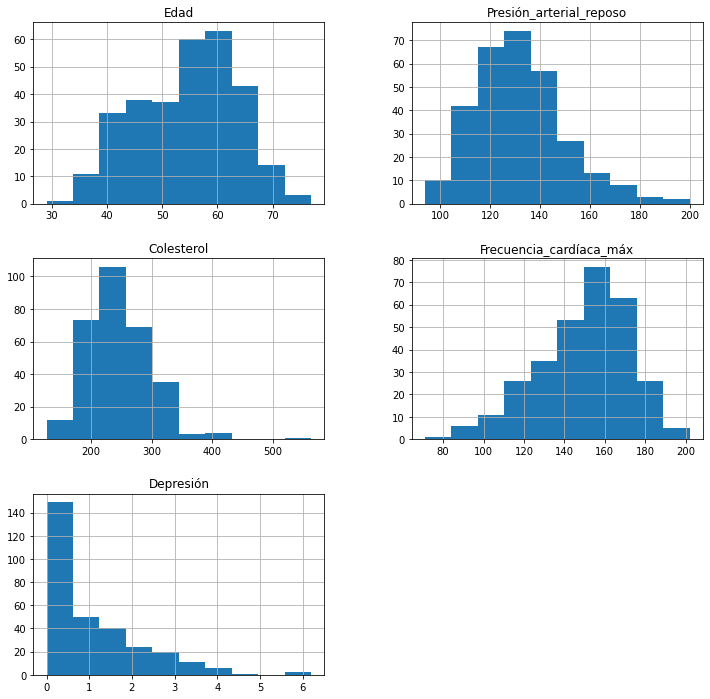

In [97]:
df_corazon_uni.drop(['Genero','Tipo_dolor_en_pecho','Glucemia_ayunas','Arterias_con_problemas','Talasemia','Target','Angina_inducida_ejercicio','Punto_maximo','Resultados_electrocardiográficos_reposo'],1).hist(figsize = (12, 12))
plt.show()

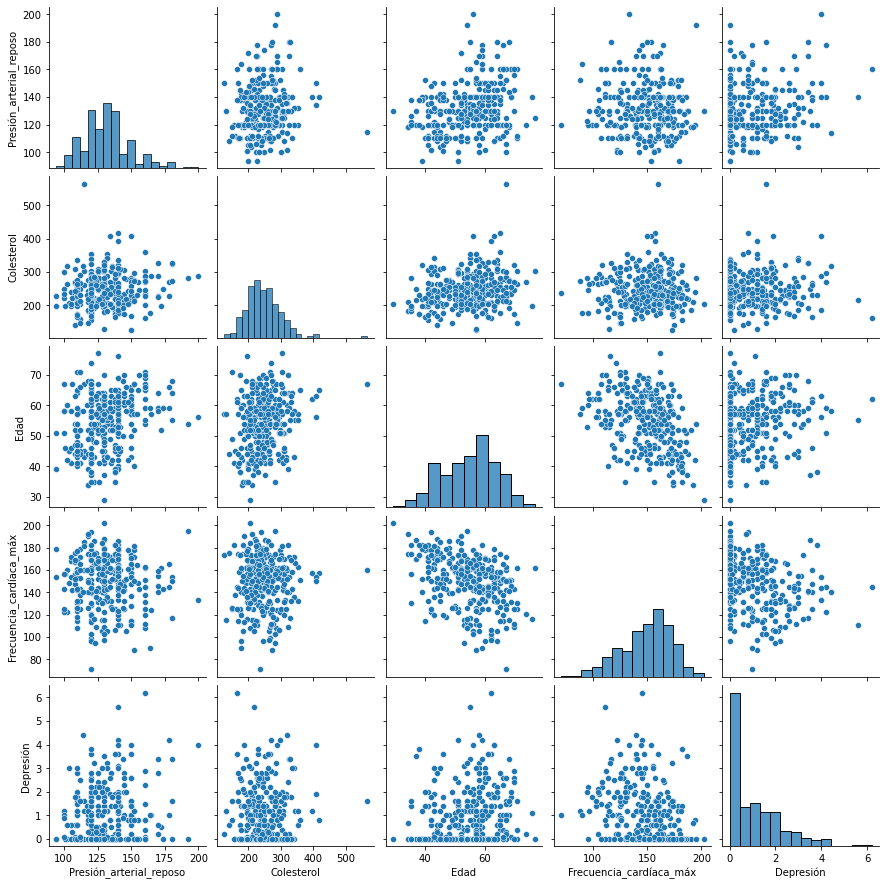

In [104]:
numeric_columns=['Presión_arterial_reposo','Colesterol','Edad','Frecuencia_cardíaca_máx','Depresión']
sns.pairplot(df_corazon[numeric_columns])


**Buscar outliers**

Edad

C:\Users\Camila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Camila\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


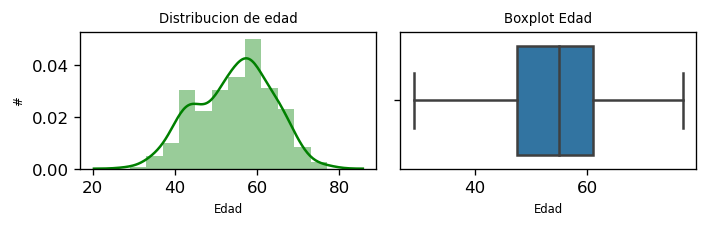

In [77]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (6,2))

plot0=sns.distplot(df_corazon_uni[df_corazon_uni['Edad']!=0]['Edad'],ax=axes[0],color='green')
axes[0].set_title('Distribucion de edad',fontdict={'fontsize':8})
axes[0].set_xlabel('Edad',fontdict={'fontsize':7})
axes[0].set_ylabel('#',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df_corazon_uni[df_corazon_uni['Edad']!=0]['Edad'],ax=axes[1],orient='v')
axes[1].set_title('Boxplot Edad',fontdict={'fontsize':8})
axes[1].set_xlabel('Edad',fontdict={'fontsize':7})
plt.tight_layout()

Presión_arterial_reposo: Se detectan outliers en la distribución


C:\Users\Camila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Camila\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


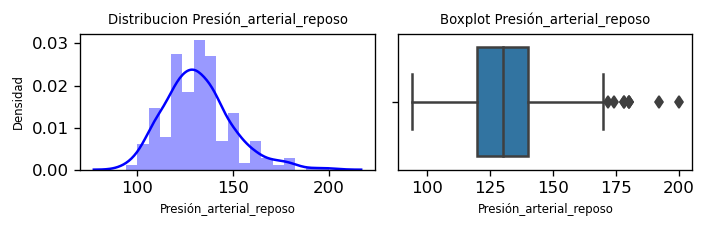

In [78]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (6,2))

plot0=sns.distplot(df_corazon_uni[df_corazon_uni['Presión_arterial_reposo']!=0]['Presión_arterial_reposo'],ax=axes[0],color='blue')
axes[0].set_title('Distribucion Presión_arterial_reposo',fontdict={'fontsize':8})
axes[0].set_xlabel('Presión_arterial_reposo',fontdict={'fontsize':7})
axes[0].set_ylabel('Densidad',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df_corazon_uni[df_corazon_uni['Presión_arterial_reposo']!=0]['Presión_arterial_reposo'],ax=axes[1],orient='v')
axes[1].set_title('Boxplot Presión_arterial_reposo',fontdict={'fontsize':8})
axes[1].set_xlabel('Presión_arterial_reposo',fontdict={'fontsize':7})
plt.tight_layout()

Chol: Se detectan outliers en la distribución

C:\Users\Camila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Camila\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


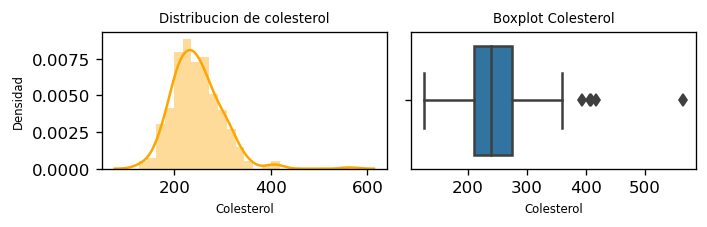

In [79]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (6,2))

plot0=sns.distplot(df_corazon_uni[df_corazon_uni['Colesterol']!=0]['Colesterol'],ax=axes[0],color='orange')
axes[0].set_title('Distribucion de colesterol',fontdict={'fontsize':8})
axes[0].set_xlabel('Colesterol',fontdict={'fontsize':7})
axes[0].set_ylabel('Densidad',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df_corazon_uni[df_corazon_uni['Colesterol']!=0]['Colesterol'],ax=axes[1],orient='v')
axes[1].set_title('Boxplot Colesterol',fontdict={'fontsize':8})
axes[1].set_xlabel('Colesterol',fontdict={'fontsize':7})
plt.tight_layout()

Thalach: Se detectan outliers en la distribución

C:\Users\Camila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Camila\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


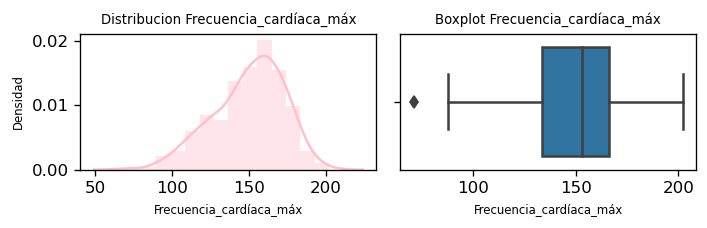

In [80]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (6,2))

plot0=sns.distplot(df_corazon_uni[df_corazon_uni['Frecuencia_cardíaca_máx']!=0]['Frecuencia_cardíaca_máx'],ax=axes[0],color='pink')
axes[0].set_title('Distribucion Frecuencia_cardíaca_máx',fontdict={'fontsize':8})
axes[0].set_xlabel('Frecuencia_cardíaca_máx',fontdict={'fontsize':7})
axes[0].set_ylabel('Densidad',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df_corazon_uni[df_corazon_uni['Frecuencia_cardíaca_máx']!=0]['Frecuencia_cardíaca_máx'],ax=axes[1],orient='v')
axes[1].set_title('Boxplot Frecuencia_cardíaca_máx',fontdict={'fontsize':8})
axes[1].set_xlabel('Frecuencia_cardíaca_máx',fontdict={'fontsize':7})
plt.tight_layout()

En principio como nuestra muestra es muy pequeña decidimos **NO** eliminar a los registros que podrían ser considerados atípicos, ademas por la materia de la información de las variables decidimos no eliminar registros.

**Análisis Bivariado: Comparativa respecto la variables Target**

Text(0.5, 1.0, 'Genero v/s Target\n')

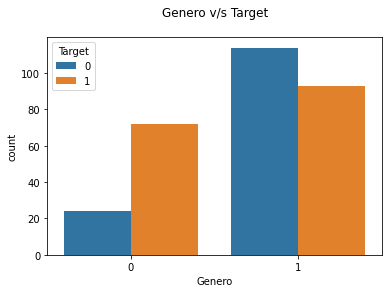

In [81]:
sns.countplot(data= df_corazon_uni, x='Genero',hue='Target')
plt.title('Genero v/s Target\n')

Según este conjunto de datos, los hombres son más susceptibles a contraer enfermedades cardíacas que las mujeres. Los hombres experimentan más ataques cardíacos que las mujeres. Los hombres experimentan ataques cardíacos repentinos entre el 70% y el 89%. La mujer puede experimentar un ataque cardíaco sin ninguna presión en el pecho.

Text(0.5, 1.0, 'Tipo de dolor en el pecho v/s Target\n')

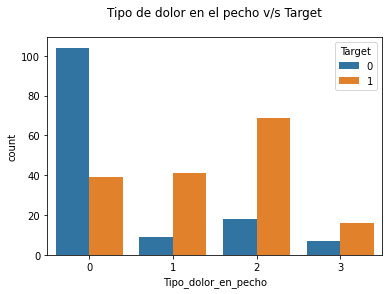

In [82]:
sns.countplot(data= df_corazon_uni, x='Tipo_dolor_en_pecho',hue='Target')
plt.title('Tipo de dolor en el pecho v/s Target\n')

Hay cuatro tipos de dolor ene le pecho, asintomático, angina atípica, dolor no anginoso y angina típica. La mayoría de los pacientes con enfermedades cardíacas presentan dolor de pecho asintomático. Un ataque asintomático, como cualquier ataque cardíaco, implica un bloqueo del flujo sanguíneo al corazón y un posible daño al músculo cardíaco. Los factores de riesgo de ataques cardíacos asintomáticos son los mismos que los de los síntomas cardíacos.

Edad vs Target

C:\Users\Camila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


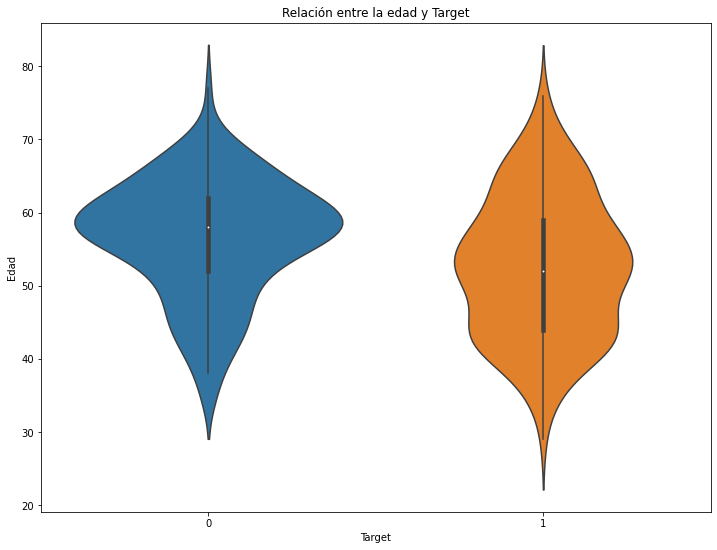

In [83]:
df_corazon_multi=df_corazon
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(df_corazon_multi['Target'], 
                df_corazon_multi['Edad'])
plt.title('Relación entre la edad y Target')
plt.show()

Relación entre el tipo de dolor en el pecho y target

Text(0.5, 1.0, 'Relación entre el tipo de dolor en el pecho y target')

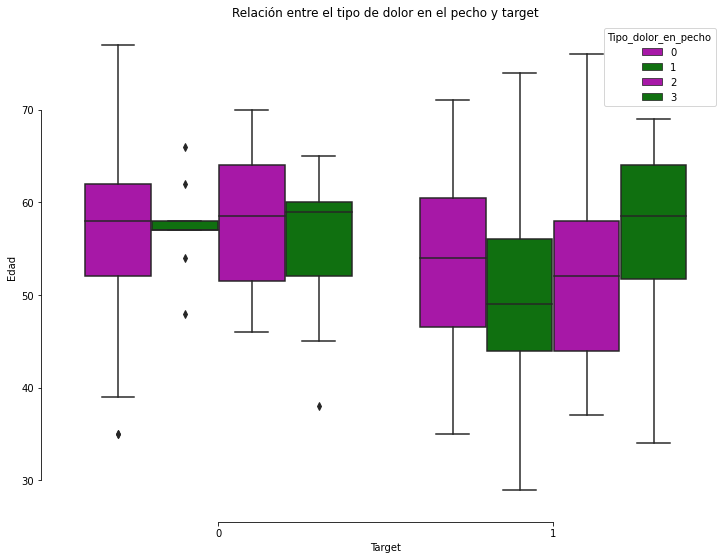

In [84]:
sns.boxplot(x="Target", y="Edad",
            hue="Tipo_dolor_en_pecho", palette=["m", "g"],
            data=df_corazon_multi)
sns.despine(offset=10, trim=True)
plt.title('Relación entre el tipo de dolor en el pecho y target')

Relación entre el tipo de dolor en el pecho despues del ejercicio y el target

Text(0.5, 1.0, 'Angina_inducida_ejercicio v/s Target\n')

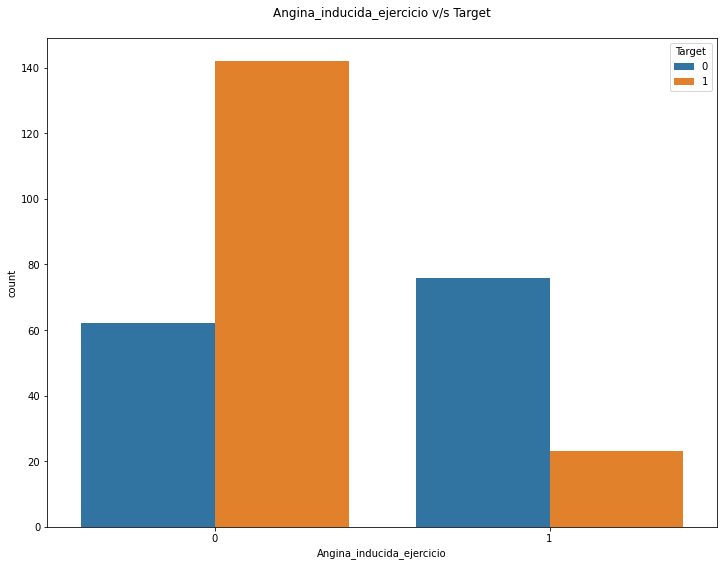

In [86]:
sns.countplot(data= df_corazon, x='Angina_inducida_ejercicio',hue='Target')
plt.title('Angina_inducida_ejercicio v/s Target\n')

Presion arterial en reposo

La distribución sugiere que los pacientes que tienen más probabilidades de no sufrir la enfermedad tienen una presión arterial ligeramente mayor que los pacientes que tienen enfermedades cardíacas.

C:\Users\Camila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


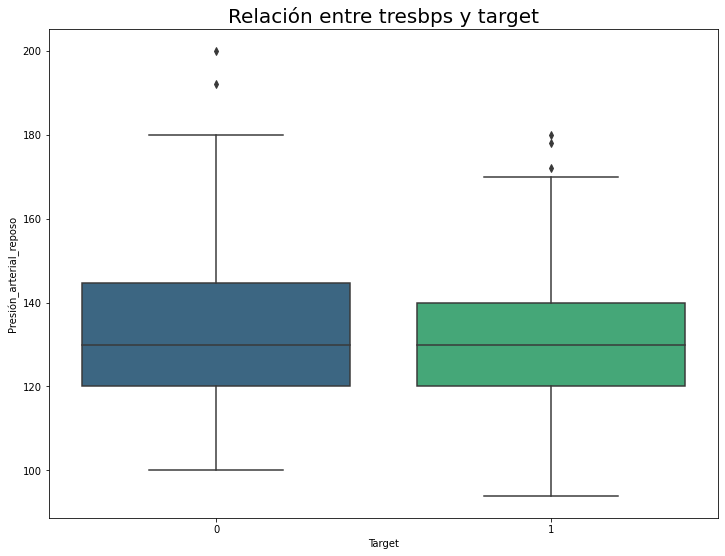

In [87]:
# tresbps vs target
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df_corazon_multi['Target'], df_corazon['Presión_arterial_reposo'], palette = 'viridis')
plt.title('Relación entre tresbps y target', fontsize = 20)
plt.show()

Chol - niveles de colesterol

Se observa que los pacientes que tienen más probabilidades de no sufrir la enfermedad tienen una presión arterial ligeramente mayor que los pacientes que tienen enfermedades cardíacas.

C:\Users\Camila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


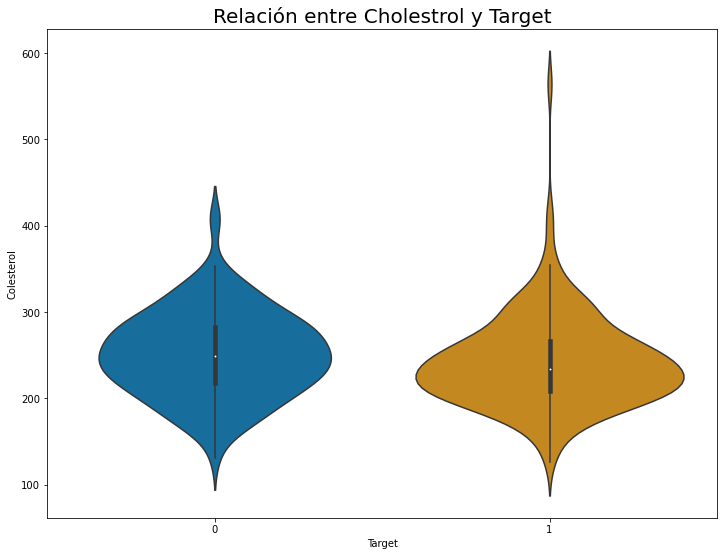

In [88]:
# cholestrol vs target
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(df_corazon['Target'], df_corazon['Colesterol'], palette = 'colorblind')
plt.title('Relación entre Cholestrol y Target', fontsize = 20, fontweight = 30)
plt.show()

Presión_arterial_reposo

C:\Users\Camila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


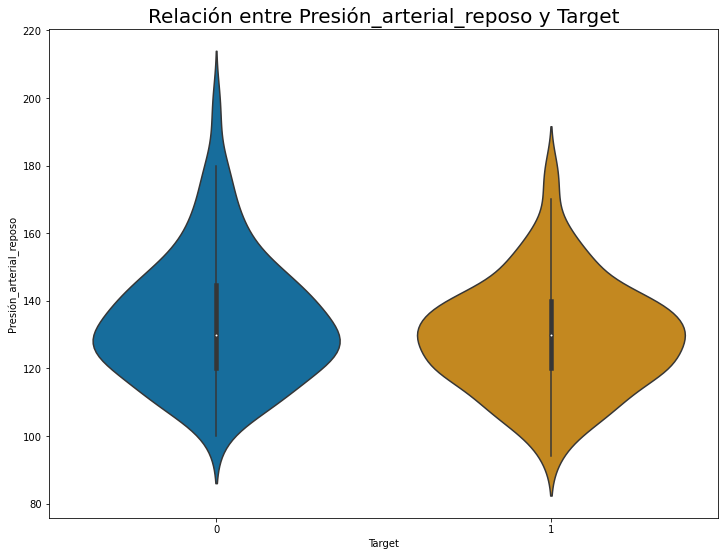

In [96]:
# Presión_arterial_reposo vs target
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(df_corazon['Target'], df_corazon['Presión_arterial_reposo'], palette = 'colorblind')
plt.title('Relación entre Presión_arterial_reposo y Target', fontsize = 20, fontweight = 30)
plt.show()

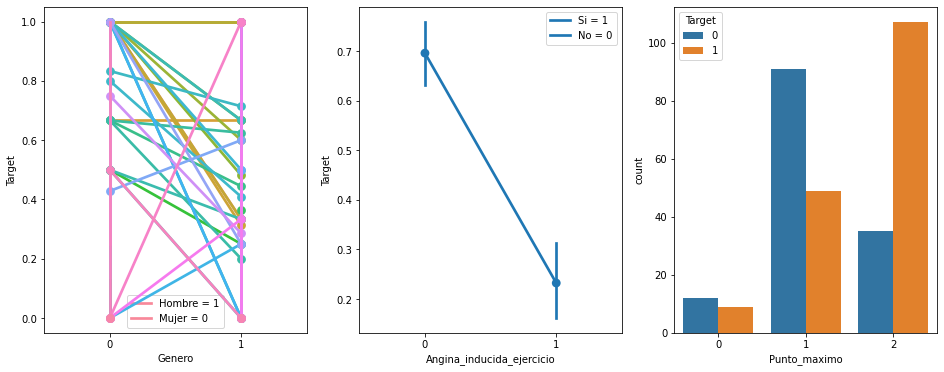

In [111]:
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x='Genero',y='Target',hue='Presión_arterial_reposo',data=df_corazon)
plt.legend(['Hombre = 1', 'Mujer = 0'])

plt.subplot(132)
sns.pointplot(x='Angina_inducida_ejercicio',y='Target',data=df_corazon)
plt.legend(['Si = 1', 'No = 0'])

plt.subplot(133)
sns.countplot(x="Punto_maximo", hue='Target', data=df_corazon)
plt.show()

**Extra**

Dado el analisis general de las variables quizas sea relevante realizar bivariado de la variable Target respecto otras variables que definiamos anterioremente con nivel correlación más bajo.

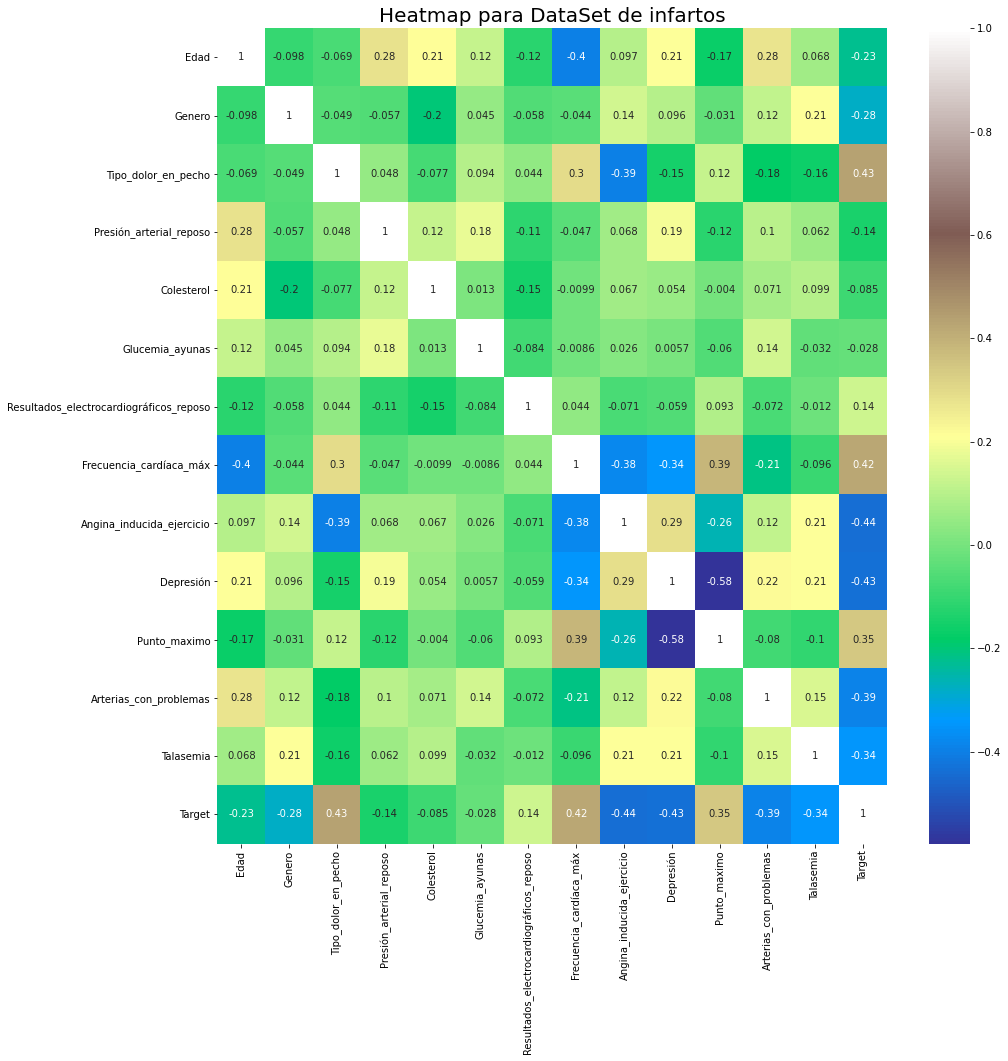

In [108]:
plt.rcParams['figure.figsize'] = (15, 15)

sns.heatmap(df_corazon.corr(), annot = True, cmap = 'terrain')
plt.title('Heatmap para DataSet de infartos', fontsize = 20)
plt.show()

### 3. Conclusiones Análisis inicial de la bbdd  <a name="3"></a>

Dada unas preguntas iniciales que nos hicimos, luego de analizar la base

Niveles de Colesterol: Dada la evidencia de la muestra se observó que  los pacientes con probabilidades de sufrir enfermedades cardíacas tienen niveles de colesterol más altos en comparación con los pacientes con los que  probablemente no padezcan enfermedades cardíacas.

Edad: No se observan resultados esperados, se recomienda repetir el ejercicio con una muestra más grande

Presión Arterial: La distribución sugiere que los pacientes que tienen más probabilidades de no sufrir la enfermedad tienen una presión arterial ligeramente mayor que los pacientes que tienen enfermedades cardíacas.

Dolor en el pecho:  La mayoría de los pacientes con enfermedades cardíacas presentan dolor de pecho asintomático. De hecho se detectó correlación relevante respecto a la variable target.

